In [349]:
pat = pd.read_csv('/Users/americanthinker/Downloads/patient_cleaned.csv')

In [86]:
defi = pd.read_csv('/Users/americanthinker/Downloads/definition.csv')

### Drop DateTStamp and both Address columns

In [7]:
pat = pat.iloc[:, :-1]
inds = pat.iloc[:, 8][pat.iloc[:, 8].notnull()].index
pd.set_option('display.max_rows', 500)
pat.drop(['Address', 'Address2'], axis=1, inplace=True)

In [24]:
appt = pd.read_csv('/Users/americanthinker/Downloads/appt_cleaned.csv', low_memory=False)

In [25]:
appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66383 entries, 0 to 66382
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AptNum        66383 non-null  int64 
 1   PatNum        66383 non-null  int64 
 2   AptStatus     66383 non-null  int64 
 3   Confirmed     66383 non-null  int64 
 4   Op            66383 non-null  int64 
 5   Note          66383 non-null  object
 6   ProvNum       66383 non-null  int64 
 7   AptDateTime   66383 non-null  object
 8   InsPlan1      66383 non-null  int64 
 9   InsPlan2      66383 non-null  int64 
 10  ProcsColored  2277 non-null   object
dtypes: int64(8), object(3)
memory usage: 5.6+ MB


In [82]:
appt['Confirmed'].value_counts()

373    28641
21     25204
362     8424
361     1740
19       658
365      521
363      380
369      265
364      207
367      180
370      117
368       38
366        8
Name: Confirmed, dtype: int64

In [ ]:
#procedure_code

In [46]:
pd.set_option('display.max_columns', 60)

In [54]:
appt.loc[:, 'AptDateTime'] = pd.to_datetime(appt['AptDateTime'], errors='coerce')

In [81]:
#(appt['AptDateTime'][appt['AptDateTime'].between('2020-12-01', '2020-12-31')]).sort_values()

In [71]:
appt[appt['AptDateTime'].between('2020-12-22', '2020-12-23')]['AptDateTime'].value_counts().sort_index()

2020-12-22 08:00:00      2
2020-12-22 09:00:00      2
2020-12-22 09:30:00      1
2020-12-22 10:00:00      1
2020-12-22 10:30:00      1
2020-12-22 11:00:00      2
2020-12-22 11:14:04    140
2020-12-22 12:00:00      2
Name: AptDateTime, dtype: int64

In [73]:
appt[appt['AptDateTime'] >= '2020-12-01']['AptDateTime'].sort_values()

15935   2020-12-01 07:00:00
15072   2020-12-01 08:00:00
14725   2020-12-01 09:00:00
12235   2020-12-01 09:00:00
13589   2020-12-01 10:00:00
                ...        
15577   2021-06-24 09:00:00
15940   2021-07-13 08:00:00
15941   2021-07-13 08:00:00
16190   2021-07-13 11:00:00
15339   2021-09-23 15:00:00
Name: AptDateTime, Length: 1259, dtype: datetime64[ns]

In [111]:
full_set = set(full.DefNum.values)

In [106]:
defi_set = set(defi[defi['Category'] == 2].DefNum.values)

In [189]:
history_by_month = pd.to_datetime(full['AptDateTime'].dt.strftime('%Y-%m').dropna()).value_counts().sort_index()

In [190]:
to_dec = history_by_month.loc[:'2020-12-01']

In [194]:
to_dec.mean()

310.45971563981044

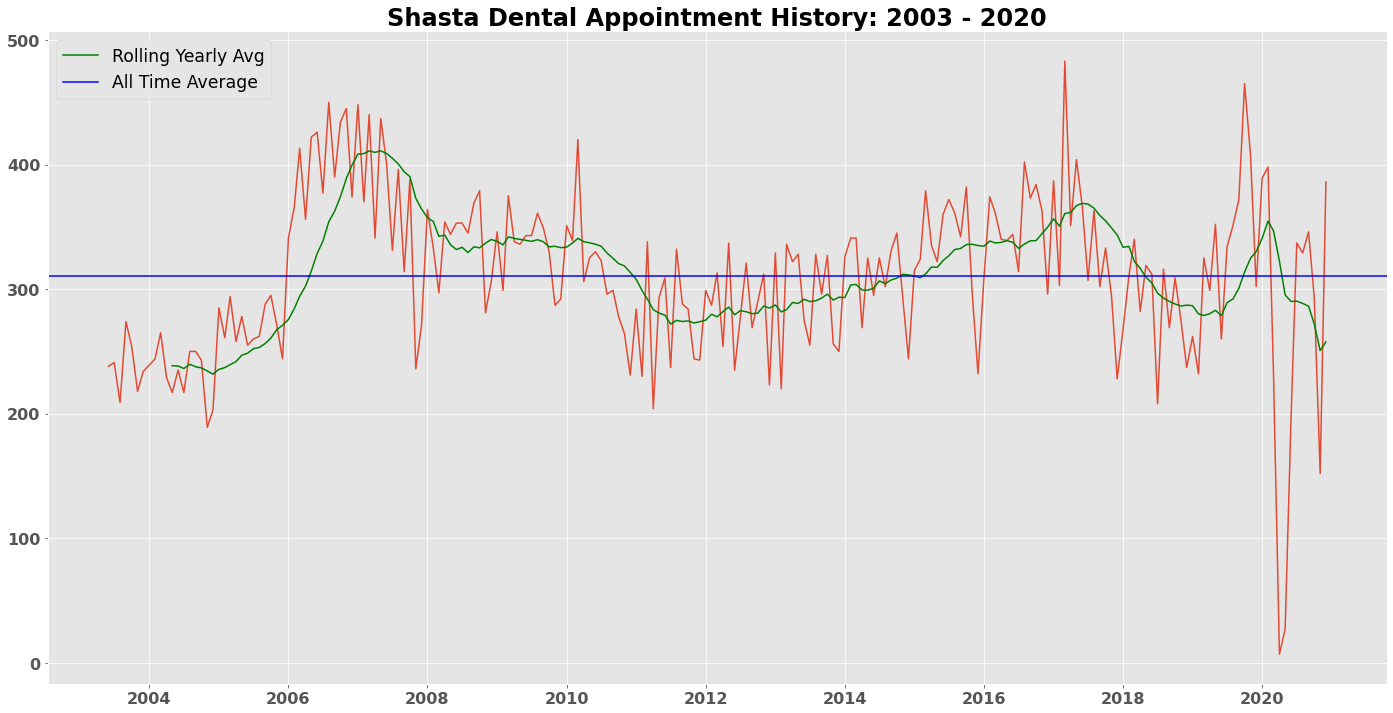

In [215]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(24,12))
plot = plt.plot(to_dec.index, to_dec.values)
plot2 = plt.plot(rolling.index, rolling.values, color='green', label='Rolling Yearly Avg')
xticks = plt.xticks(fontsize=16, fontweight='bold')
yticks = plt.yticks(fontsize=16, fontweight='bold')
title = plt.title('Shasta Dental Appointment History: 2003 - 2020', fontweight='bold', fontsize=24)
hline = plt.axhline(y=to_dec.mean(), c='blue', label='All Time Average')
leg = plt.legend(fontsize='xx-large')

In [203]:
year2020 = to_dec.loc['2020-01-01':'2020-12-01']

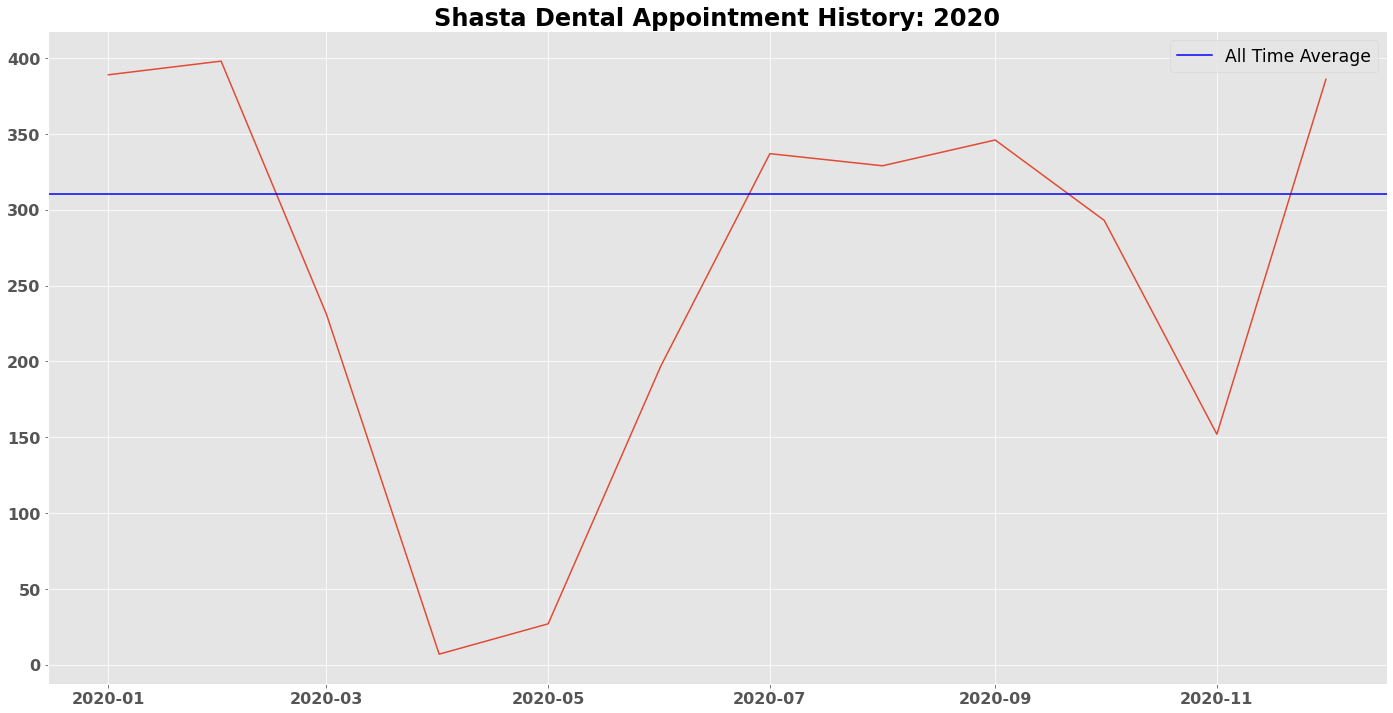

In [210]:
fig = plt.figure(figsize=(24,12))
plot = plt.plot(year2020.index, year2020.values)
xticks = plt.xticks(fontsize=16, fontweight='bold')
yticks = plt.yticks(fontsize=16, fontweight='bold')
title = plt.title('Shasta Dental Appointment History: 2020', fontweight='bold', fontsize=24)
hline = plt.axhline(y=to_dec.mean(), c='blue', label='All Time Average')
leg = plt.legend(fontsize='xx-large')

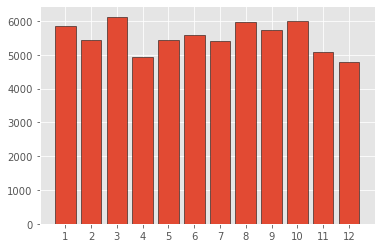

In [630]:
month_appt = appt['AptDateTime'].dt.month.value_counts().sort_index()
plot = plt.bar(month_appt.index, month_appt.values, edgecolor='black')
xticks = plt.xticks(range(1,13))

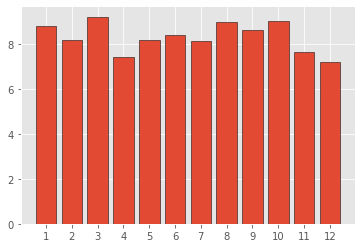

In [634]:
month_percents = month_appt/66380 * 100
plot = plt.bar(month_percents.index, month_percents.values, edgecolor='black')
xticks = plt.xticks(range(1,13))

In [224]:
appts_2020 = full[full['AptDateTime'] >= '2020-01-01']

In [247]:
good_patients_nums = appts_2020.PatNum.unique().tolist()

In [244]:
good_patients = pat[pat['PatNum'].isin(good_patients)]

In [250]:
bad_patients = pat[~pat['PatNum'].isin(good_patients_nums)]
bad_patients_nums = bad_patients.PatNum.unique().tolist()

In [256]:
temp = appt[appt["PatNum"].isin(bad_patients_nums)]

In [262]:
check = temp[temp['AptDateTime'] >= '2019-12-01'].sort_values('AptDateTime').PatNum.tolist()

In [269]:
bad_patients.PatNum.nunique()

6708

In [270]:
good_patients.PatNum.nunique()

1348

In [272]:
1348/6708

0.2009540846750149

In [277]:
fee = pd.read_csv('/Users/americanthinker/Downloads/fee.csv', low_memory=False)

In [285]:
for col in fee.columns:
    if fee[col].dtypes == 'int':
        fee[col] = pd.to_numeric(fee[col], downcast='integer')

In [699]:
fee.SecDateEntry.value_counts()

0001-01-01    196743
Name: SecDateEntry, dtype: int64

In [305]:
pd.to_datetime(pat['DateFirstVisit'], errors='coerce').dropna().value_counts()

1992-06-29    29
1998-06-30    26
1992-06-30    25
1998-06-29    21
1998-07-01    16
              ..
2014-07-15     1
2016-10-20     1
2016-12-08     1
1998-04-27     1
1999-08-23     1
Name: DateFirstVisit, Length: 3321, dtype: int64

In [316]:
pat['Birthdate'] = pd.to_datetime(pat['Birthdate'], errors='coerce')

In [317]:
pat['DateFirstVisit'] = pd.to_datetime(pat['DateFirstVisit'], errors='coerce')

In [323]:
now = pd.to_datetime('now')

In [328]:
(now - pat['Birthdate']).astype('<m8[Y]')

0       76.0
1       39.0
2       10.0
3        3.0
4       14.0
        ... 
8051    24.0
8052    79.0
8053     NaN
8054    47.0
8055    21.0
Name: Birthdate, Length: 8056, dtype: float64

In [371]:
df['age'] = round((now - df['Birthdate']).dt.total_seconds() / (60*60*24*365.25), 1)

In [372]:
df.Birthdate.sort_values()

5373   1900-11-08
4185   1905-08-12
6607   1910-05-02
5020   1910-06-23
4608   1910-11-16
          ...    
8040          NaT
8047          NaT
8049          NaT
8050          NaT
8053          NaT
Name: Birthdate, Length: 8056, dtype: datetime64[ns]

In [362]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [376]:
df['age'].fillna(50.5, inplace=True)

In [378]:
df[df['PatNum'].isin(good_patients_nums)]

,PatNum,LName,FName,PatStatus,Gender,Position,Birthdate,City,State,Zip,HmPhone,WkPhone,WirelessPhone,Guarantor,Email,EstBalance,PriProv,SecProv,BillingType,ImageFolder,ChartNumber,Bal_0_30,Bal_31_60,Bal_61_90,BalOver90,InsEst,BalTotal,EmployerNum,DateFirstVisit,HasIns,Premed,PreferContactMethod,age
0,8491,Coates,Paula,0,1,1,1944-11-19,Redding,CA,96003,(209)825-8925,NaN,NaN,8103,NaN,161.0,7,0,352,CoatesPaula8491,009238,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0,2020-08-10,I,0,2,76.1
1,8494,Daumont,Cyril,0,0,1,1981-10-22,Redding,CA,96003,NaN,NaN,(530)782-8221,6881,melissa.daumont512@gmail.com,158.4,7,0,352,DaumontCyril8494,009241,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,934,2020-08-19,I,0,4,39.2
2,8495,Zahniser,Tate,0,0,2,2010-11-18,Bella Vista,CA,96008,(530)310-2166,NaN,(530)310-5212,8270,NaN,45.0,1,0,352,ZahniserTate8495,009242,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0,2020-09-02,I,0,4,10.1
3,8496,Dennis,McKenna,0,1,2,2017-05-18,REDDING,CA,96003,NaN,NaN,(530)262-8400,6528,NaN,10.0,1,0,352,DennisMcKenna8496,009243,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0,2020-09-08,I,0,4,3.6
4,8497,Hurst,Landon,0,0,2,2006-04-12,REDDING,CA,96003,NaN,NaN,(530)262-8400,6528,Marcidennis@gmail.com,15.0,1,0,352,HurstLandon8497,009244,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0,2020-09-08,I,0,4,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,4179,Noble,Janel,0,1,1,1982-11-09,Anderson,CA,96007,NaN,NaN,(530)638-6339,4179,NaN,-26.5,1,0,352,NobleJanel4179,004586,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0,2006-11-16,I,0,4,38.1
8006,4202,GIBSON,RHONDA,0,1,1,1967-09-17,Anderson,CA,96007,NaN,NaN,(530)364-6046,3009,NaN,262.2,7,0,352,GIBSONRHONDA4202,004614,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0,2006-11-30,I,0,4,53.3
8010,4206,MURDOCH,SUSAN,0,1,1,1962-06-24,Cottonwood,CA,96022,NaN,NaN,(530)604-5650,4206,NaN,-2593.0,1,0,352,MURDOCHSUSAN4206,004619,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,294,2006-11-30,I,0,4,58.5
8011,4207,FANOE,HENRY,0,0,0,1948-10-16,Redding,CA,96001,(530)242-1808,NaN,NaN,2529,NaN,3877.3,1,0,352,FANOEHENRY4207,004620,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0,2006-12-04,I,0,2,72.2


In [380]:
df['churn'] = np.where(df['PatNum'].isin(good_patients_nums), 0, 1)

In [396]:
temp = appt.merge(df, on='PatNum')

In [406]:
churned = temp[temp['churn'] == 1]

In [409]:
time_delta = churned['AptDateTime'] - churned['DateFirstVisit']

In [427]:
td_index = time_delta.sort_values().dropna().head(100).index

In [429]:
test = temp[temp.index.isin(td_index)]

In [433]:
test['AptDateTime'] = test['AptDateTime'].dt.date

/Users/americanthinker/anaconda/envs/snakes/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [438]:
check = test.loc[:, ['AptDateTime', 'DateFirstVisit']]

In [443]:
check.loc[:, 'AptDateTime'] = pd.to_datetime(check['AptDateTime'])

In [445]:
check['delta'] = check['AptDateTime'] - check['DateFirstVisit']

In [447]:
pay = pd.read_csv('/Users/americanthinker/Downloads/payment.csv')

In [454]:
nulls = pay.columns[pay.isna().sum() == 46575]

In [455]:
pay.drop(nulls, axis=1, inplace=True)

In [456]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46575 entries, 0 to 46574
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PayNum               46575 non-null  int64  
 1   PayType              46575 non-null  int64  
 2   PayDate              46575 non-null  object 
 3   PayAmt               46575 non-null  float64
 4   CheckNum             18833 non-null  object 
 5   PayNote              643 non-null    object 
 6   IsSplit              46575 non-null  int64  
 7   PatNum               46575 non-null  int64  
 8   ClinicNum            46575 non-null  int64  
 9   DateEntry            46575 non-null  object 
 10  DepositNum           46575 non-null  int64  
 11  IsRecurringCC        46575 non-null  int64  
 12  SecUserNumEntry      46575 non-null  int64  
 13  SecDateTEdit         46575 non-null  object 
 14  PaymentSource        46575 non-null  int64  
 15  ProcessStatus        46575 non-null 

In [457]:
pay.head()

,PayNum,PayType,PayDate,PayAmt,CheckNum,PayNote,IsSplit,PatNum,ClinicNum,DateEntry,DepositNum,IsRecurringCC,SecUserNumEntry,SecDateTEdit,PaymentSource,ProcessStatus,RecurringChargeDate,PaymentStatus
0,1,343,1998-06-29,100.0,2289,NaN,0,4,0,1998-06-29,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0
1,2,343,1998-06-30,57.0,270,NaN,0,68,0,1998-06-30,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0
2,3,344,1998-06-30,100.0,NaN,NaN,0,72,0,1998-06-30,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0
3,4,344,1998-06-30,20.0,NaN,NaN,0,16,0,1998-06-30,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0
4,5,345,1998-07-01,112.8,visa,NaN,0,33,0,1998-07-01,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0


<AxesSubplot:>

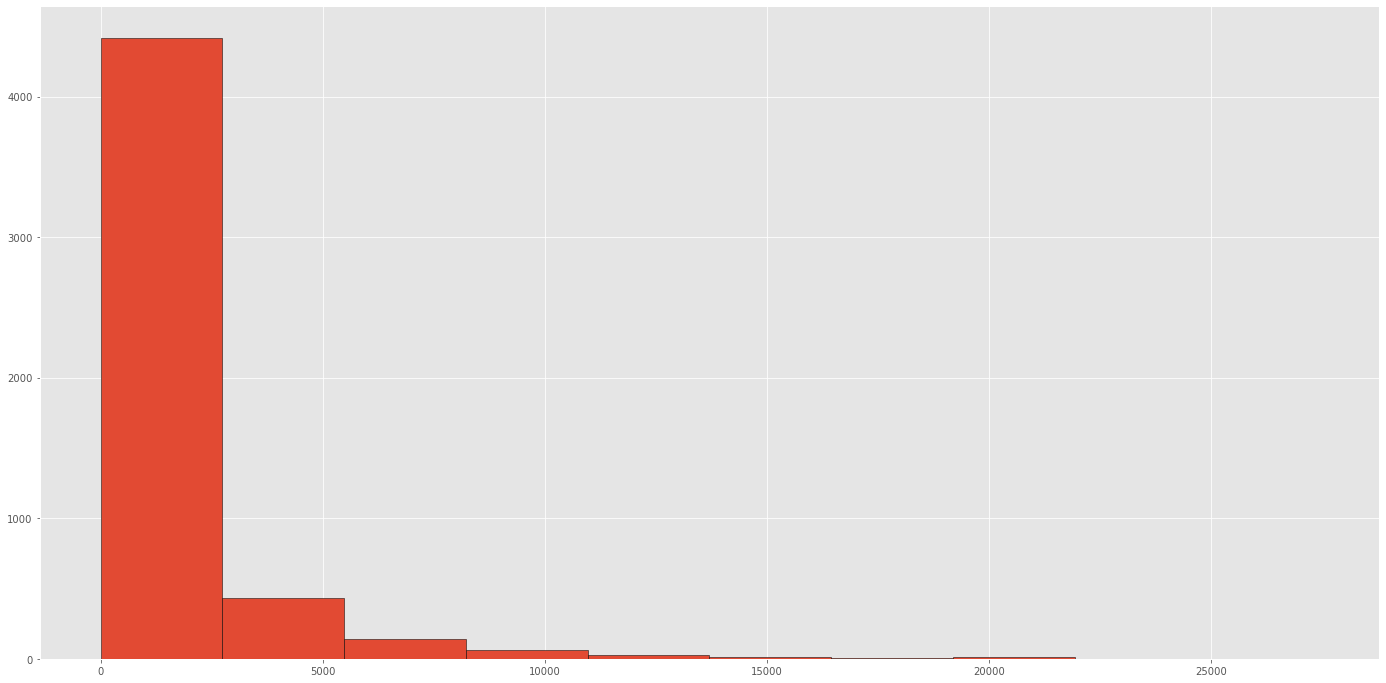

In [484]:
fig = plt.figure(figsize=(24,12))
pay.groupby('PatNum')['PayAmt'].sum().hist(edgecolor='black')

In [475]:
import seaborn as sns

In [489]:
ltv = pay.groupby('PatNum')['PayAmt'].sum().sort_values(ascending=False)

In [492]:
ltv[ltv > 0].mean()

1403.1884457356296

In [502]:
truth_array = ltv.index.isin(good_patients_nums)

In [513]:
len(ltv[truth_array])

1095

In [510]:
len(good_patients_nums)

1348

In [521]:
pd.Series(pay['PatNum'].unique()).isin(good_patients_nums).sum()

1095

In [522]:
1348 - 1095

253

In [530]:
good_payers = pay[pay['PatNum'].isin(good_patients_nums)]

In [532]:
good_payers.loc[:, 'PayDate'] = pd.to_datetime(good_payers['PayDate'])

/Users/americanthinker/anaconda/envs/snakes/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [557]:
pay.loc[:, 'PayDate'] = pd.to_datetime(pay['PayDate'])

In [559]:
pay['year'] = pay['PayDate'].dt.year

In [560]:
total = pay[pay['PayAmt'] > 0]

In [563]:
total['PayDate'].sort_values()

0       1998-06-29
1       1998-06-30
2       1998-06-30
3       1998-06-30
13      1998-07-01
           ...    
40013   2020-12-21
40012   2020-12-21
40011   2020-12-21
40017   2020-12-21
40024   2020-12-21
Name: PayDate, Length: 41262, dtype: datetime64[ns]

In [536]:
gp = good_payers[good_payers['PayAmt'] > 0]

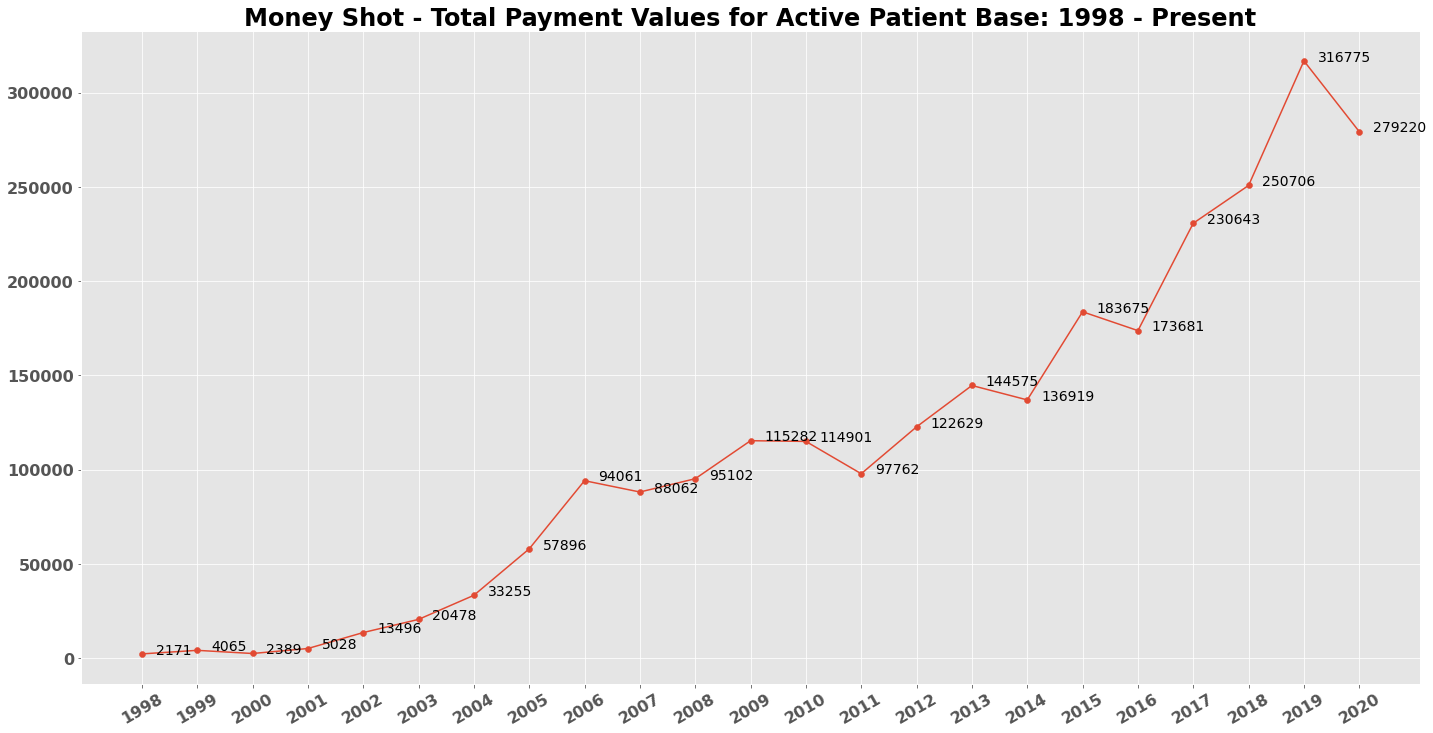

In [569]:
fig = plt.figure(figsize=(24, 12))
grouped = gp.groupby('year')['PayAmt'].sum()
line = plt.plot(grouped.index, grouped.values)
scatter = plt.scatter(grouped.index, grouped.values, marker='o')
title = plt.title('Money Shot - Total Payment Values for Active Patient Base: 1998 - Present', 
                  fontweight='bold', fontsize=24)
for i, txt in enumerate(grouped.values):
    plt.annotate(round(txt), (grouped.index[i] + 0.25, grouped.values[i]+100), fontsize=14)
xticks = plt.xticks(ticks=grouped.index, labels=grouped.index, fontweight='bold', fontsize=16, rotation=30)
yticks = plt.yticks(fontweight='bold', fontsize=16)

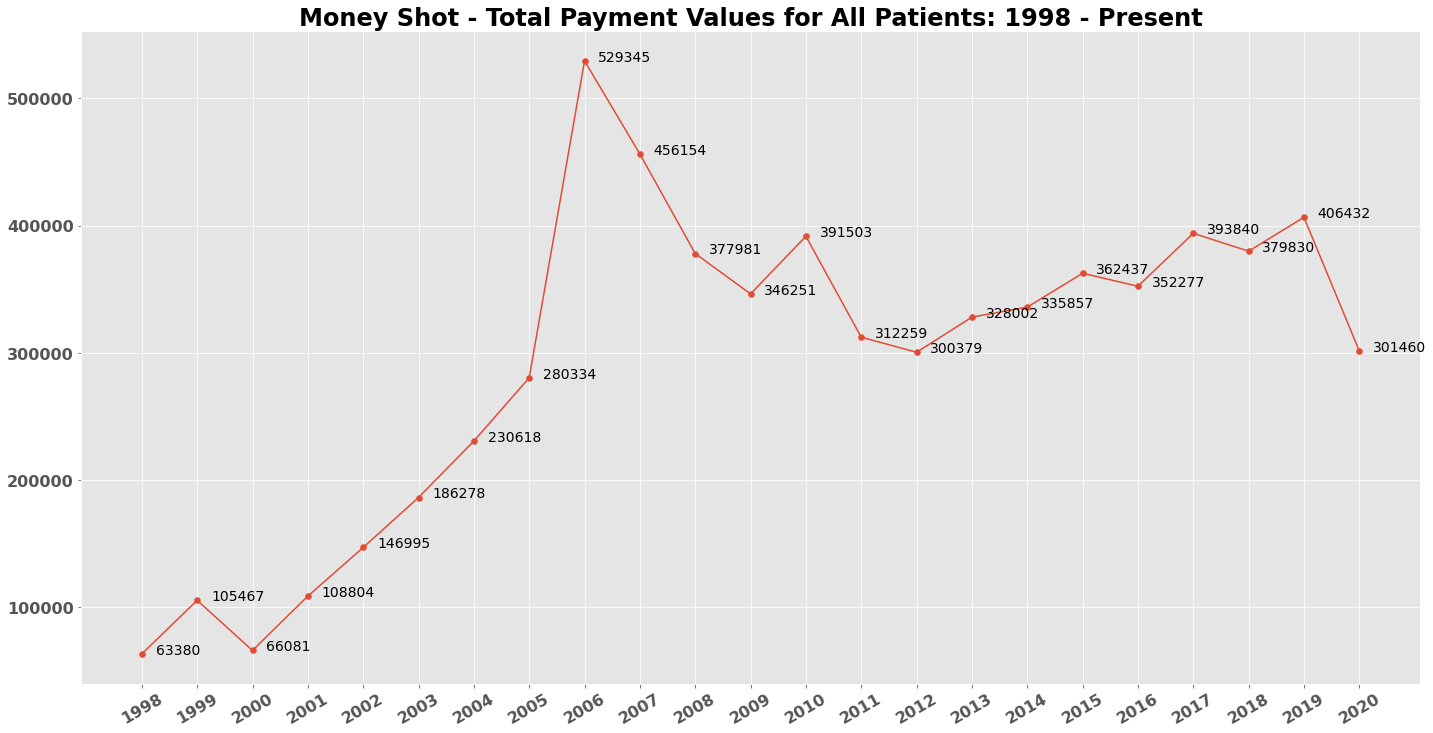

In [570]:
fig = plt.figure(figsize=(24, 12))
grouped_tot = total.groupby('year')['PayAmt'].sum()
line = plt.plot(grouped_tot.index, grouped_tot.values)
scatter = plt.scatter(grouped_tot.index, grouped_tot.values, marker='o')
title = plt.title('Money Shot - Total Payment Values for All Patients: 1998 - Present', 
                  fontweight='bold', fontsize=24)
for i, txt in enumerate(grouped_tot.values):
    plt.annotate(round(txt), (grouped_tot.index[i] + 0.25, grouped_tot.values[i]+100), fontsize=14)
xticks = plt.xticks(ticks=grouped_tot.index, labels=grouped_tot.index, fontweight='bold', fontsize=16, rotation=30)
yticks = plt.yticks(fontweight='bold', fontsize=16)

In [572]:
bp = pay[~pay['PatNum'].isin(good_patients_nums)]

In [575]:
bp = bp[bp['PayAmt'] > 0]

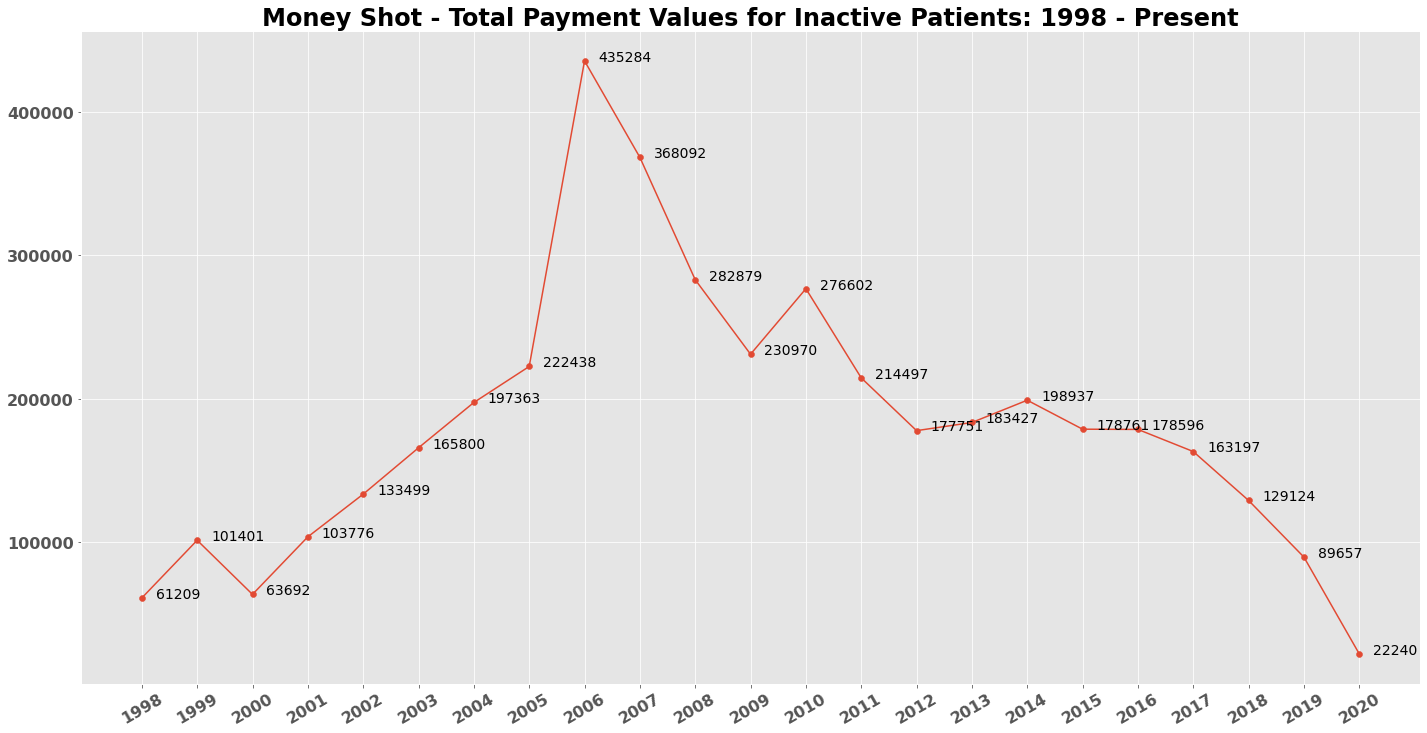

In [577]:
fig = plt.figure(figsize=(24, 12))
grouped_bp = bp.groupby('year')['PayAmt'].sum()
line = plt.plot(grouped_bp.index, grouped_bp.values)
scatter = plt.scatter(grouped_bp.index, grouped_bp.values, marker='o')
title = plt.title('Money Shot - Total Payment Values for Inactive Patients: 1998 - Present', 
                  fontweight='bold', fontsize=24)
for i, txt in enumerate(grouped_bp.values):
    plt.annotate(round(txt), (grouped_bp.index[i] + 0.25, grouped_bp.values[i]+100), fontsize=14)
xticks = plt.xticks(ticks=grouped_bp.index, labels=grouped_bp.index, fontweight='bold', fontsize=16, rotation=30)
yticks = plt.yticks(fontweight='bold', fontsize=16)

In [578]:
pay

,PayNum,PayType,PayDate,PayAmt,CheckNum,PayNote,IsSplit,PatNum,ClinicNum,DateEntry,DepositNum,IsRecurringCC,SecUserNumEntry,SecDateTEdit,PaymentSource,ProcessStatus,RecurringChargeDate,PaymentStatus,year
0,1,343,1998-06-29,100.0,2289,NaN,0,4,0,1998-06-29,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0,1998
1,2,343,1998-06-30,57.0,270,NaN,0,68,0,1998-06-30,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0,1998
2,3,344,1998-06-30,100.0,NaN,NaN,0,72,0,1998-06-30,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0,1998
3,4,344,1998-06-30,20.0,NaN,NaN,0,16,0,1998-06-30,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0,1998
4,5,345,1998-07-01,112.8,visa,NaN,0,33,0,1998-07-01,1,0,0,2020-12-22 11:21:55,0,0,0001-01-01,0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46570,46571,0,2020-12-22,0.0,NaN,NaN,0,4233,0,2020-12-22,0,0,1,2020-12-22 12:12:53,0,0,0001-01-01,0,2020
46571,46572,0,2020-12-22,0.0,NaN,NaN,0,4234,0,2020-12-22,0,0,1,2020-12-22 12:12:53,0,0,0001-01-01,0,2020
46572,46573,0,2020-12-22,0.0,NaN,NaN,0,4236,0,2020-12-22,0,0,1,2020-12-22 12:12:53,0,0,0001-01-01,0,2020
46573,46574,0,2020-12-22,0.0,NaN,NaN,0,4238,0,2020-12-22,0,0,1,2020-12-22 12:12:53,0,0,0001-01-01,0,2020


- total active patients;
- annual attrition rate; and
- annual patient growth rate.

### Track Active Patient Base over time:
- Monthly 
- Yearly

### Decide on different churn metrics
- Time elapsed since last visit
- Tenure:
    - Time since first visit 
    - Active time range

### Define Attrition Rate
### Calculate growth rates

In [587]:
pat['fullname'] = pat['FName'] + ' ' + pat['LName']

In [589]:
pat['fullname'] = pat['fullname'].str.lower()

In [601]:
dup_names = pat['fullname'][pat['fullname'].duplicated()].values

In [614]:
pat[pat['fullname'].isin(dup_names)].sort_values('fullname').head(6)

,PatNum,LName,FName,PatStatus,Gender,Position,Birthdate,Address,Address2,City,State,Zip,HmPhone,WkPhone,WirelessPhone,Guarantor,Email,EstBalance,PriProv,SecProv,BillingType,ImageFolder,ChartNumber,Bal_0_30,Bal_31_60,Bal_61_90,BalOver90,InsEst,BalTotal,EmployerNum,DateFirstVisit,HasIns,Premed,PreferContactMethod,DateTStamp,fullname
1402,5686,.,.,0,0,0,1953-12-04,220 (Test Only: Limited To 3 Characters),NaN,Palo Cedro,CA,96073,(530)524-7495,NaN,NaN,5686,NaN,0.0,1,0,352,NaN,006265,0.0,0.0,0.0,0.0,0.0,0.0,0,2010-04-27,NaN,0,2,2020-12-22 12:22:41,. .
1293,5571,.,.,2,0,0,0001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5571,NaN,0.0,1,0,352,NaN,006139,0.0,0.0,0.0,0.0,0.0,0.0,0,2009-12-08,NaN,0,4,2020-12-22 12:13:46,. .
1315,5597,0,0,1,1,0,1982-10-06,278 (Test Only: Limited To 3 Characters),NaN,Shingletown,CA,96088,(530)222-3855,NaN,NaN,5597,NaN,0.0,1,0,352,NaN,006166,0.0,0.0,0.0,0.0,0.0,0.0,0,2010-01-11,NaN,0,2,2020-12-22 12:22:41,0 0
1307,5585,0,0,2,1,1,0001-01-01,NaN,NaN,Redding,CA,96001,NaN,NaN,NaN,1720,NaN,0.0,1,0,352,NaN,006154,0.0,0.0,0.0,0.0,0.0,0.0,0,2009-12-23,I,0,4,2020-12-22 12:13:46,0 0
1680,5975,Hooper,Aaron,2,0,1,1974-01-19,157 (Test Only: Limited To 3 Characters),NaN,Redding,CA,96003,(530)917-6424,NaN,NaN,5975,NaN,-290.1,1,0,352,HooperAaron5975,006561,0.0,0.0,0.0,0.0,0.0,0.0,367,2011-05-12,I,0,2,2020-12-22 12:22:41,aaron hooper
2664,7006,Hooper,Aaron,0,0,0,1974-01-19,157 (Test Only: Limited To 3 Characters),NaN,REDDING,CA,96003,NaN,NaN,(530)917-6424,7006,NaN,-332.0,1,0,352,HooperAaron7006,007625,0.0,0.0,0.0,0.0,0.0,0.0,0,2015-06-03,I,0,4,2020-12-22 12:22:41,aaron hooper


In [619]:
appt[(appt['AptDateTime'] > '2020-12-23')&(appt['PatNum'].isin(good_patients_nums))]

,AptNum,PatNum,AptStatus,Confirmed,Op,Note,ProvNum,AptDateTime,InsPlan1,InsPlan2,ProcsColored
4296,55644,7038,1,373,3,"4BW, PerMaint\r\n- Thu - Nov 8, 2018 -cx wcb",15,2021-05-25 08:00:00,507,0,"<span color=""-16777216"">4BW</span><span color=..."
7490,58842,6831,1,373,1,"exam, 4BW, PerMaint\r\n- Tue - Nov 6, 2018 -lm...",10,2021-02-24 16:00:00,2960,0,"<span color=""-16777216"">exam</span><span color..."
9432,60787,8208,1,370,5,"fill\r\n- Wed - Aug 5, 2020 -jb - Fri - Nov 6...",7,2021-02-11 11:00:00,3628,0,NaN
9758,61113,7335,1,373,2,"exam, Prophy\r\npt ca on weave- Mon - Aug 12, ...",15,2021-01-18 11:00:00,3209,0,"<span color=""-16777216"">exam</span><span color..."
9940,61295,3252,1,373,3,"exam, 4BW, PA1st, PA, Prophy\r\npt wants to wa...",15,2021-01-13 13:00:00,1331,0,"<span color=""-16777216"">exam</span><span color..."
...,...,...,...,...,...,...,...,...,...,...,...
16378,67741,7722,1,373,5,Resin#19\r\n,7,2021-01-19 15:00:00,2223,0,"<span color=""-16777216"">#19-B-C1(P)</span>"
16379,67742,6414,1,373,1,"Prophy, Flv\r\n",10,2021-06-22 12:00:00,1047,0,"<span color=""-16777216"">Prophy</span><span col..."
16380,67743,8446,1,373,5,fills\r\n,7,2021-01-21 15:00:00,3751,0,NaN
16381,67744,6140,1,373,5,Resin# 5 occ\r\n,7,2021-01-25 16:00:00,2647,2645,"<span color=""-16777216"">#5-O-C1(P)</span>"


In [645]:
pat[pat['PatNum'].isin(good_patients_nums)]['Gender'].value_counts()/1348 * 100

1    52.818991
0    47.181009
Name: Gender, dtype: float64

In [646]:
pat['Gender'].value_counts()/len(pat) * 100

0    52.830189
1    47.169811
Name: Gender, dtype: float64

In [650]:
df['fullname'] = df['FName'] + ' ' + df['LName']

In [651]:
df['fullname'] = df['fullname'].str.lower()

In [662]:
first_visit = df['DateFirstVisit'].dt.strftime('%Y-%m').value_counts().sort_index()

In [674]:
def plotter(df, title):
    fig = plt.figure(figsize=(24, 12))
    line = plt.plot(df.index, df.values)
    title = plt.title(title, fontweight='bold', fontsize=24)
    xticks = plt.xticks(ticks=df.index, labels=df.index, fontweight='bold', fontsize=14, rotation=90)
    yticks = plt.yticks(fontweight='bold', fontsize=16)

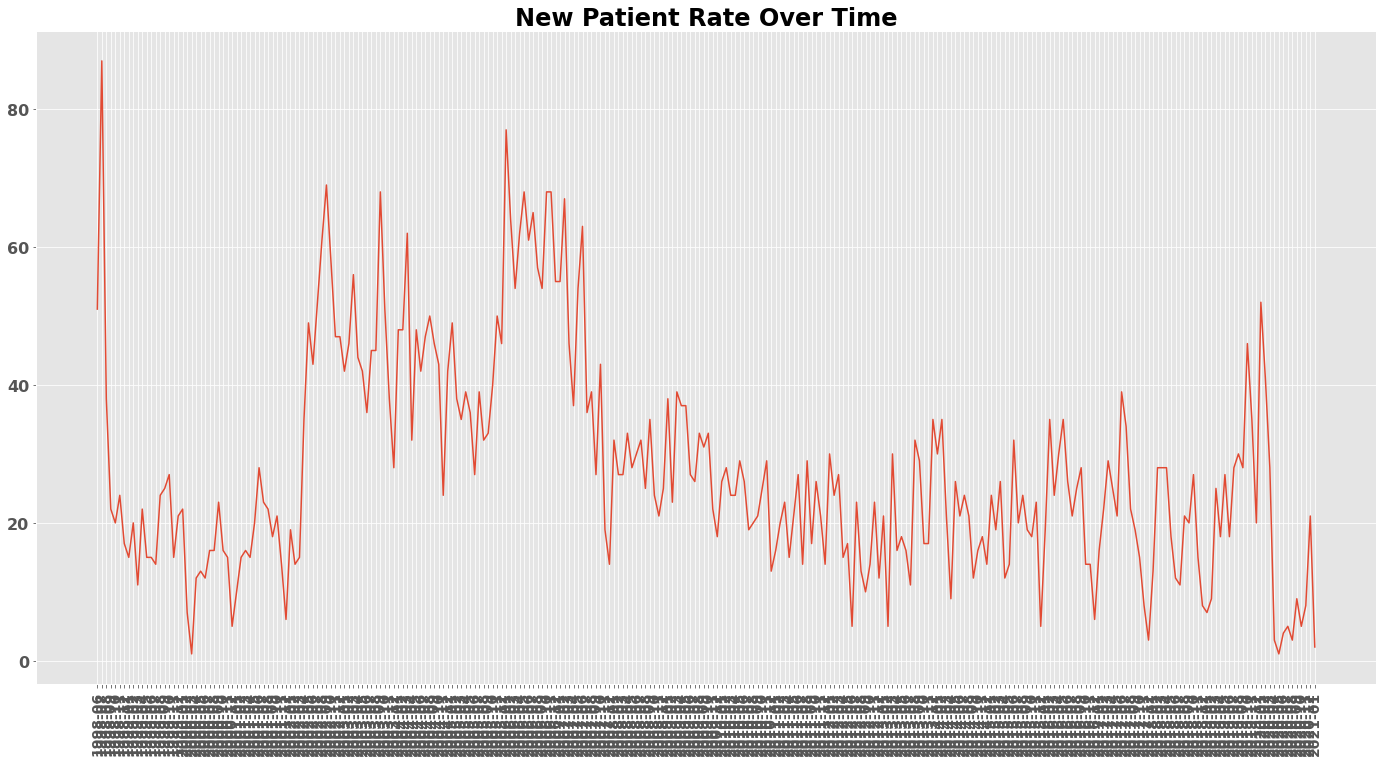

In [675]:
plotter(first_visit, 'New Patient Rate Over Time')

In [671]:
first_visit = first_visit[first_visit.index > '1998-05']

In [682]:
first_visit

1998-06    51
1998-07    87
1998-08    38
1998-09    22
1998-10    20
1998-11    24
1998-12    17
1999-01    15
1999-02    20
1999-03    11
1999-04    22
1999-05    15
1999-06    15
1999-07    14
1999-08    24
1999-09    25
1999-10    27
1999-11    15
1999-12    21
2000-01    22
2000-02     7
2000-03     1
2000-04    12
2000-05    13
2000-06    12
2000-07    16
2000-08    16
2000-09    23
2000-10    16
2000-11    15
2000-12     5
2001-01    10
2001-02    15
2001-03    16
2001-04    15
2001-05    20
2001-06    28
2001-07    23
2001-08    22
2001-09    18
2001-10    21
2001-11    14
2001-12     6
2002-01    19
2002-02    14
2002-03    15
2002-04    35
2002-05    49
2002-06    43
2002-07    52
2002-08    61
2002-09    69
2002-10    58
2002-11    47
2002-12    47
2003-01    42
2003-02    46
2003-03    56
2003-04    44
2003-05    42
2003-06    36
2003-07    45
2003-08    45
2003-09    68
2003-10    51
2003-11    38
2003-12    28
2004-01    48
2004-02    48
2004-03    62
2004-04    32
2004-0

In [690]:
df[df['DateFirstVisit'] >= '2020-11-01'].sort_values("DateFirstVisit").Zip.value_counts()

96001    12
96003     5
96002     4
96088     2
60014     2
96019     2
96007     2
96073     1
Name: Zip, dtype: int64